# Exercise 9.1' 2D Schrodinger Equation
<!-- <img src="./image/0902_01.png" width="400"></img>
![formula2](./image/0902_02'.png)
![formula2](./image/0902_02.png) -->

In [3]:
# %matplotlib widget
%matplotlib notebook
# %matplotlib tk
# %matplotlib inline
# %matplotlib qt
import numpy as np
from numpy import empty, zeros, max, ones, array, arange, pi
from pylab import imshow, gray, show, imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos
from pylab import plot, xlabel, show, grid

target = 1e-3
m = 9.1094e-31
hbar = 1.0546e-34
e = 1.6022e-19
L = 5.2918e-11
N = 1000
h = L/N
V0 = 100*e


## harmonic oscilation potential
# def V(x):    
#     return V0*(x/L)*(x/L-1) 

# free electron well potentiial
def V(x):
    return 0.0


def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x) - E)*psi
    return array([fpsi, fphi], float)

def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    
    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1, x+0.5*h, E)
        k3 = h*f(r+0.5*k2, x+0.5*h, E)
        k4 = h*f(r+k3, x+h, E)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
    return r[0]

In [5]:
# 固有状態でのエネルギーを計算

# E1 = 1200*e
# E2 = 3100*e
# psi2 = solve(E1)
# target = e/1000
# while abs(E1 - E2) > target:
#     psi1, psi2 = psi2, solve(E2)
#     E1, E2 = E2,E2 - psi2*(E2 - E1)/(psi2 - psi1)
# #     print(E2/e)
    
# print("E=", E2/e, "eV")

E= 4834.3093914198635 eV


## 定常状態
- n=1: E = 134.3[eV]
- n=2: E = 537.1[eV]
- n=3: E = 1208.6[eV]
- n=4: E = 2148.6[eV]
- n=5: E = 4834.3[eV]

<IPython.core.display.Javascript object>


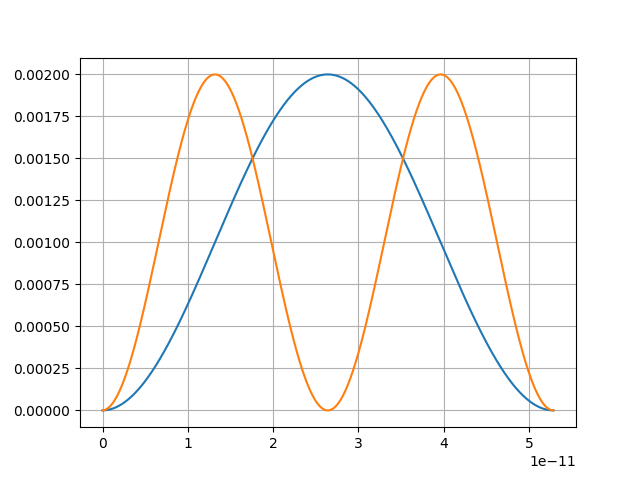

<IPython.core.display.Javascript object>


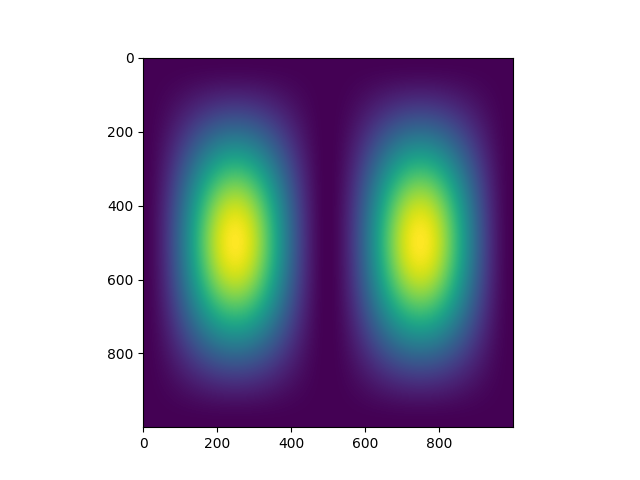

<IPython.core.display.Javascript object>


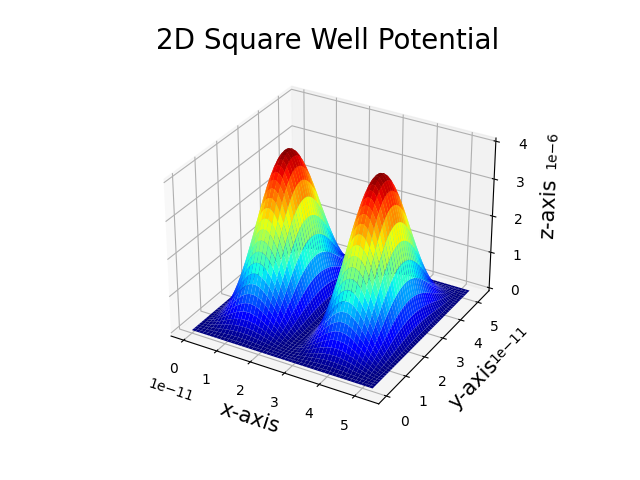

In [20]:
E1 = 134.3*e
E2 = 537.1*e
E3 = 1208.6*e
E4 = 2148.6*e
E5 = 4834.3*e

E_X = E1
E_Y = E2




fig1 = plt.figure()  #実はこの行は省略できる

psi = 0.0
phi = 1.0

tpoints = arange(0,L,h)
def Wave_Func(E):
    r = array([psi,phi],float)
    x_return2 = np.array([])
    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1, x+0.5*h, E)
        k3 = h*f(r+0.5*k2, x+0.5*h, E)
        k4 = h*f(r+k3, x+h, E)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        x_return2 = np.append(x_return2,r[0])
    x_sum = sum(x_return2*x_return2)
    x_return2 = x_return2**2/x_sum
    plot(tpoints, x_return2)
    return x_return2

xpoints = Wave_Func(E_X)
ypoints = Wave_Func(E_Y)
 
grid()    
# show()




### x方向とy方向を独立に算出して、足し合わせる

fig2 = plt.figure()
### x方向とy方向を独立に算出して、足し合わせる
xx = np.matrix([xpoints,])
xx2 = np.matrix([ypoints,])

for i in range(len(xpoints)-1):
    xx = np.insert(xx,xx.shape[0],xpoints,axis=0)

for i in range(len(ypoints)-1):
    xx2 = np.insert(xx2,xx2.shape[0],ypoints,axis=0)

# tmp = np.power(xx,2).T + np.power(xx2,2)
# tmp = xx.T + xx2
tmp = np.multiply(xx.T, xx2)
X, Y = np.meshgrid(tpoints,tpoints)
imshow(tmp)
# plt.show()




fig3 = plt.figure()
# ax = Axes3D(fig3)
ax = fig3.add_subplot(projection='3d')

ax.set_title("2D Square Well Potential", size = 20)

ax.set_xlabel("x-axis",size=15,color="black")
ax.set_ylabel("y-axis",size=15,color="black")
ax.set_zlabel("z-axis",size=15,color="black")
 
# ax.plot_wireframe(X, Y, tmp)
# ax.scatter(X, Y, tmp, s=1, c="red")
ax.plot_surface(X, Y, tmp, cmap="jet")
# ax.contour(X, Y, tmp, colors="black", offset=1)

plt.show()